In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt

### Several insights about datasets. 
1. Here, I'm gonna perform with multi-class classification.
2. Dataset consists of grayscale images.
3. Subsests are as given: covid, normal, and viral pneumonia.

### Defining ImageDataGenerator objects for loading the data.

In [63]:
train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    zoom_range=0.1,
    
    #Randomly rotate the image between -25,25 degrees
    rotation_range=25, 

    #Shift the image along its width by up to +/- 5%
    width_shift_range=0.05, 

    #Shift the image along its height by up to +/- 5%
    height_shift_range=0.05
)



valid_data_generator = ImageDataGenerator(
    rescale = 1./255,
    zoom_range=0.1,
    
    #Randomly rotate the image between -25,25 degrees
    rotation_range=25, 

    #Shift the image along its width by up to +/- 5%
    width_shift_range=0.05, 

    #Shift the image along its height by up to +/- 5%
    height_shift_range=0.05
)


print(train_data_generator.__dict__)
print(valid_data_generator.__dict__)

{'featurewise_center': False, 'samplewise_center': False, 'featurewise_std_normalization': False, 'samplewise_std_normalization': False, 'zca_whitening': False, 'zca_epsilon': 1e-06, 'rotation_range': 25, 'width_shift_range': 0.05, 'height_shift_range': 0.05, 'shear_range': 0.0, 'zoom_range': [0.9, 1.1], 'channel_shift_range': 0.0, 'fill_mode': 'nearest', 'cval': 0.0, 'horizontal_flip': False, 'vertical_flip': False, 'rescale': 0.00392156862745098, 'preprocessing_function': None, 'dtype': 'float32', 'interpolation_order': 1, 'data_format': 'channels_last', 'channel_axis': 3, 'row_axis': 1, 'col_axis': 2, '_validation_split': 0.0, 'mean': None, 'std': None, 'zca_whitening_matrix': None, 'brightness_range': None}
{'featurewise_center': False, 'samplewise_center': False, 'featurewise_std_normalization': False, 'samplewise_std_normalization': False, 'zca_whitening': False, 'zca_epsilon': 1e-06, 'rotation_range': 25, 'width_shift_range': 0.05, 'height_shift_range': 0.05, 'shear_range': 0.0,

### Loading data.

In [64]:
#Here, I realized that specifying directory requires double dashes.

train_iterator = train_data_generator.flow_from_directory(
    directory = 'C:\\Users\\acer\\covid_classifier\\Covid19-dataset\\test',
    class_mode = 'categorical',
    color_mode = 'grayscale',
    target_size = (256, 256),
    batch_size = 32
)

valid_iterator = valid_data_generator.flow_from_directory(
    directory = 'C:\\Users\\acer\\covid_classifier\\Covid19-dataset\\train',
    class_mode = 'categorical',
    color_mode = 'grayscale',
    target_size = (256, 256),
    batch_size = 32
)

#print(train_iterator.__dict__)
#print(valid_iterator.__dict__)

Found 66 images belonging to 3 classes.
Found 251 images belonging to 3 classes.


### Creating the model.

In [65]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(256, 256, 1)))
model.add(tf.keras.layers.Conv2D(8, 3, strides=2, activation="relu")) 

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2), strides=(2,2)))

model.add(tf.keras.layers.Conv2D(8, 3, strides=2, activation="relu")) 

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2), strides=(2,2)))
    
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(16, activation = "relu"))
model.add(tf.keras.layers.Dense(4, activation="softmax"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 127, 127, 8)       80        
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 31, 31, 8)         584       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 15, 15, 8)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1800)              0         
                                                                 
 dense_12 (Dense)            (None, 16)               

### Compiling the model.

In [68]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()]
)

### Fitting the model.

In [69]:
model.fit(
    #Applicating training data
    train_iterator,
    steps_per_epoch = 5,
    epochs = 8,
    #Applicating validation data
    validation_data = valid_iterator,
    validation_steps = 5
)

#Still struggling with InvalidArgumentError: Graph execution error.

Epoch 1/8


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\acer\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\acer\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\acer\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "C:\Users\acer\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "C:\Users\acer\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\acer\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\acer\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\acer\anaconda3\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\acer\anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Users\acer\anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
      ret = callback()
    File "C:\Users\acer\anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
      self.run()
    File "C:\Users\acer\anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
      yielded = self.gen.send(value)
    File "C:\Users\acer\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Users\acer\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\acer\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Users\acer\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\acer\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "C:\Users\acer\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\acer\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\acer\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2877, in run_cell
      result = self._run_cell(
    File "C:\Users\acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2923, in _run_cell
      return runner(coro)
    File "C:\Users\acer\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3146, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-69-e52fb2611720>", line 1, in <module>
      model.fit(
    File "C:\Users\acer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\acer\anaconda3\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\acer\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\acer\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\acer\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\acer\anaconda3\lib\site-packages\keras\engine\training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\acer\anaconda3\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "C:\Users\acer\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\acer\anaconda3\lib\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\acer\anaconda3\lib\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\acer\anaconda3\lib\site-packages\keras\losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\acer\anaconda3\lib\site-packages\keras\backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [32,4] and labels shape [96]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_7054]

### Plotting categorical and validation accuracy over epochs.

NameError: name 'history' is not defined

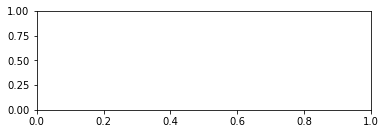

In [62]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['categorical_accuracy'])
ax1.plot(history.history['val_categorical_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper left')

### Plotting AUC and validation AUC over epochs.

In [ ]:
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['auc'])
ax2.plot(history.history['val_auc'])
ax2.set_title('model auc')
ax2.set_xlabel('epoch')
ax2.set_ylabel('auc')
ax2.legend(['train', 'validation'], loc='upper left')

fig.tight_layout()

In [ ]:
# It was adviced to use that code chunck instead of plt.show()

test_steps_per_epoch = numpy.math.ceil(valid_iterator.samples / validation_iterator.batch_size)
predictions = model.predict(validation_iterator, steps=test_steps_per_epoch)
test_steps_per_epoch = numpy.math.ceil(validation_iterator.samples / validation_iterator.batch_size)
predicted_classes = numpy.argmax(predictions, axis=1)
true_classes = validation_iterator.classes
class_labels = list(validation_iterator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   
 
cm=confusion_matrix(true_classes,predicted_classes)
print(cm)
